<a href="https://colab.research.google.com/github/adarshsingh098/EXPLORATORY-DATA-ANALYSIS-NETFLIX-/blob/main/Project2_netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv')

In [6]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# DATA CLEANING & PRE-PROCESSING:

In [10]:
df[df.isnull().any(axis = 1)].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
null_columns = df.columns[df.isnull().any()].tolist()
print(null_columns)

['director', 'cast', 'country', 'date_added', 'rating', 'duration']


In [12]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [13]:
df.isnull().sum().sum()

4307

<Axes: >

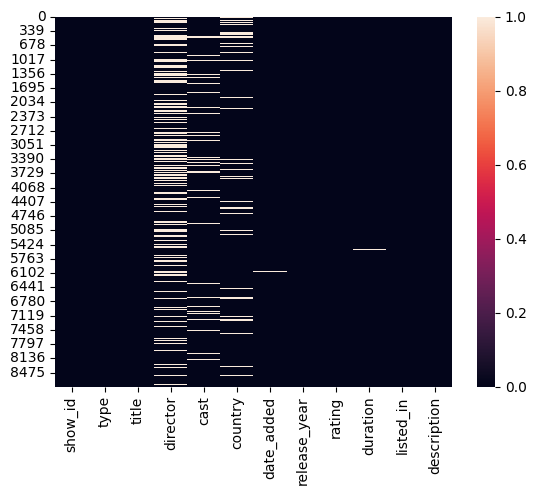

In [14]:
#heatmap of null values
sns.heatmap(df.isnull())

In [15]:
#Cast : As 825 null values are present in the 'Cast' attribute, Filling the missing values with ‘Cast not defined'

df['cast'].fillna('cast not defined',inplace=True)

<ipython-input-15-e5e1e3a72ced>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('cast not defined',inplace=True)


In [16]:
#Country : For the 'Country' attribute with 831 null values, filling the missing values with the most common country of production or ‘Country not defined'

df['country'].fillna('country not defined',inplace=True)

<ipython-input-16-035f46fd3457>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('country not defined',inplace=True)


In [17]:
#Director : For the 'Director' attribute with 2634 null values, one approach is to fill these missing values with a placeholder such as 'Unknown' or ‘Director not defined'.

df['director'].fillna('director not defined',inplace=True)

<ipython-input-17-010459c9881d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('director not defined',inplace=True)


In [18]:
#Date Added : As only 10 null values are present in 'Date Added' attribute, filling these missing values can be cakewalk. We can impute the missing dates by filling ‘Date not defined’.
df['date_added'].fillna('date not defined',inplace=True)

<ipython-input-18-781de37fb118>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna('date not defined',inplace=True)


In [19]:
#Rating : For the 'Rating' attribute with 4 null values . I replaced the values with ‘Rating not defined’
df['rating'].fillna('rating not defined',inplace=True)

<ipython-input-19-7b741b2cf3d1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('rating not defined',inplace=True)


In [20]:
# Duration : For the ‘Duration' attribute with 3 null values, I had replaced the values with ‘Duration not defined’
df['duration'].fillna('duration not defined',inplace=True)

<ipython-input-20-4133d0d318a4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna('duration not defined',inplace=True)


In [21]:
#Checking Duplicate entries:
df.duplicated().sum()


0

In [22]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


<Axes: >

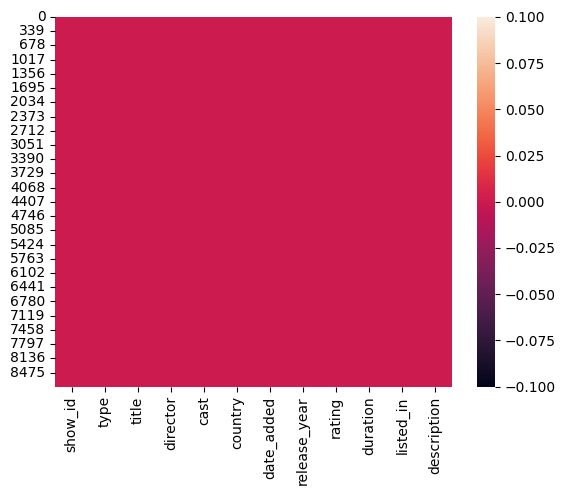

In [23]:
sns.heatmap(df.isnull())

# **Visualization -**

In [24]:
# Q1 Representing the Distribution of content over different genres :

genres = df['listed_in'].str.split(', ').explode()
unique_genres = genres.unique()
genre_counts = genres.value_counts()

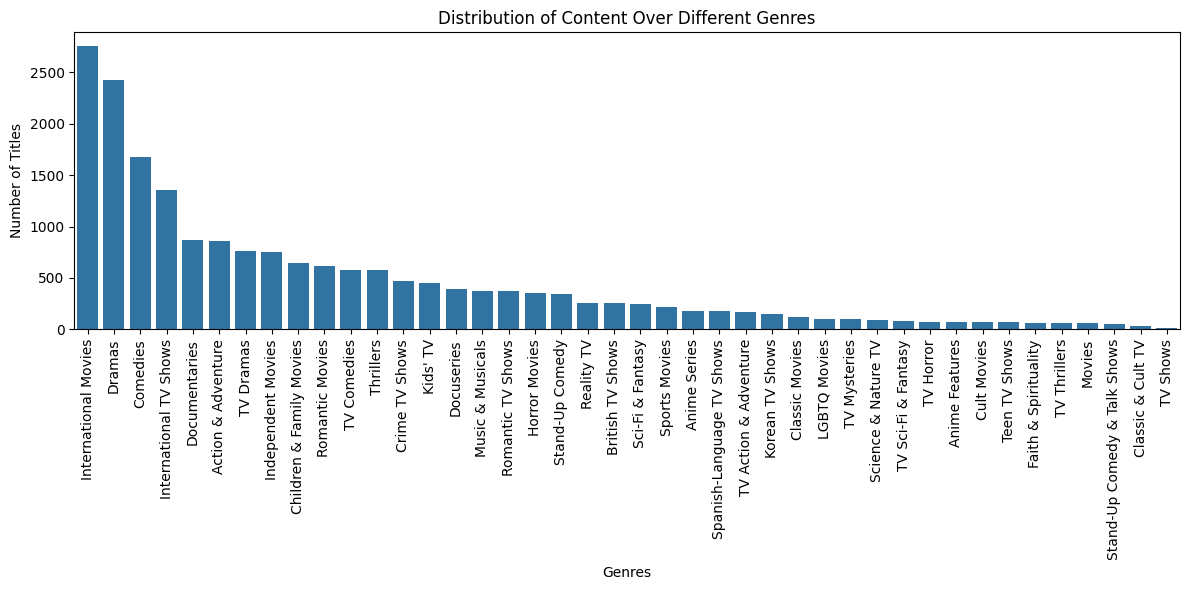

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of Titles")
plt.title("Distribution of Content Over Different Genres")
plt.tight_layout()
plt.show()

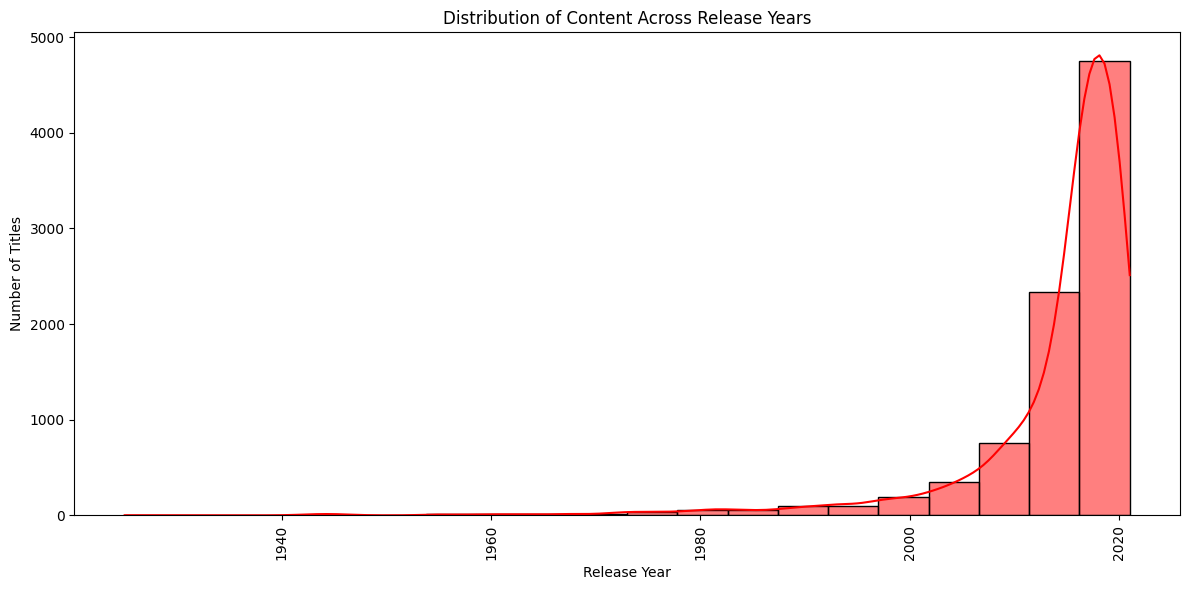

In [26]:
# Q2 Visualize the distribution of content across release years.

# Extract release years and count occurrences
release_years = df['release_year'].value_counts().sort_index()

# Create the histplot
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=20, kde=True,color="red")
plt.xticks(rotation=90)
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Distribution of Content Across Release Years")
plt.tight_layout()
plt.show()


In [27]:
# Q3 Explore the geographical distribution of content

countries = df['country'].str.split(', ').explode()
country_counts = countries.value_counts()
top_countries = country_counts.head(10)


<ipython-input-28-6b51a4b4334c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


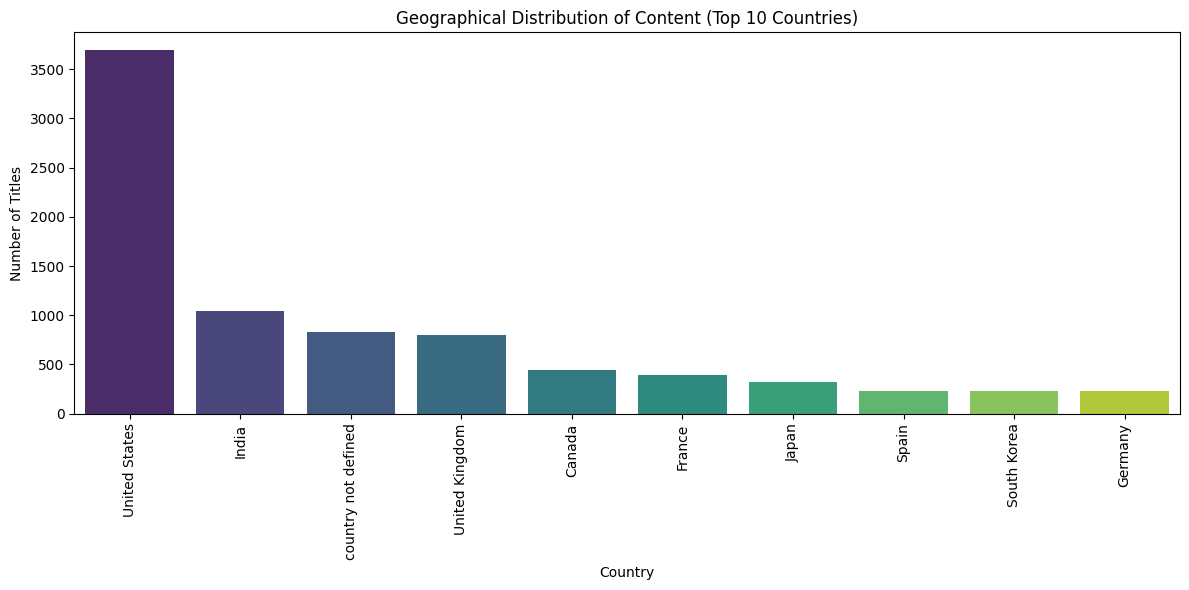

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Geographical Distribution of Content (Top 10 Countries)")
plt.tight_layout()
plt.show()

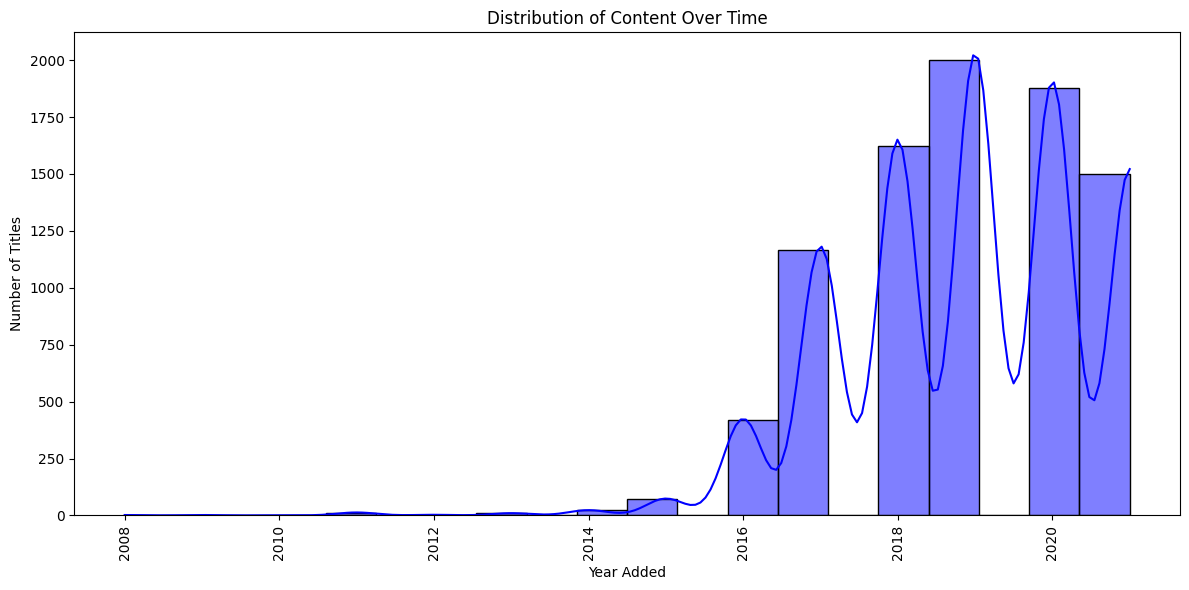

In [29]:
# Q4 Performing Time Series analysis to identify trends and patterns over time:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(12, 6))
sns.histplot(df['year_added'], bins=20, kde=True,color='blue')
plt.xticks(rotation=90)
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.title("Distribution of Content Over Time")
plt.tight_layout()
plt.show()

<ipython-input-30-4d4eebe338a9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, order=rating_counts.index,palette='crest')


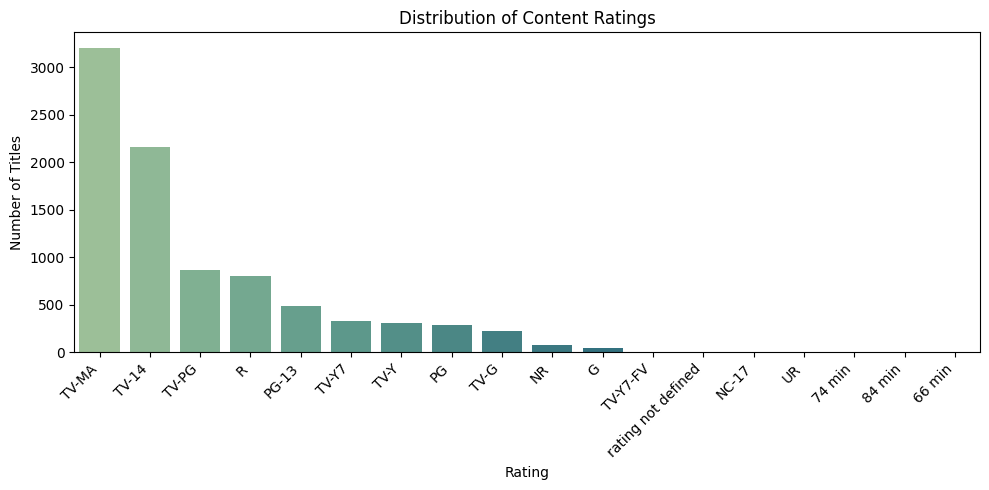

In [30]:
# Q5 Analyze the Distribution of content ratings :
rating_counts = df['rating'].value_counts()


plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=df, order=rating_counts.index,palette='crest')
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.title("Distribution of Content Ratings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# Q6 Exploring the length of Movies/TV Shows and identifying trends, if any :
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

In [32]:
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)
tv_shows['duration_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

<ipython-input-32-adafd931400c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)
<ipython-input-32-adafd931400c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


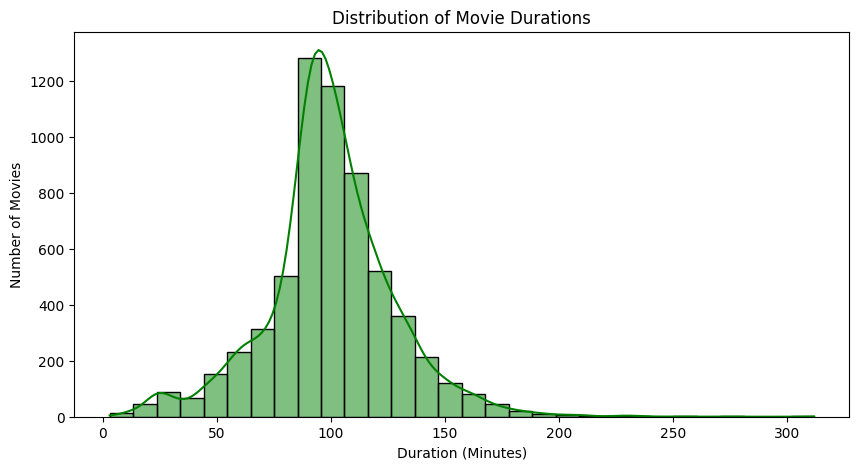

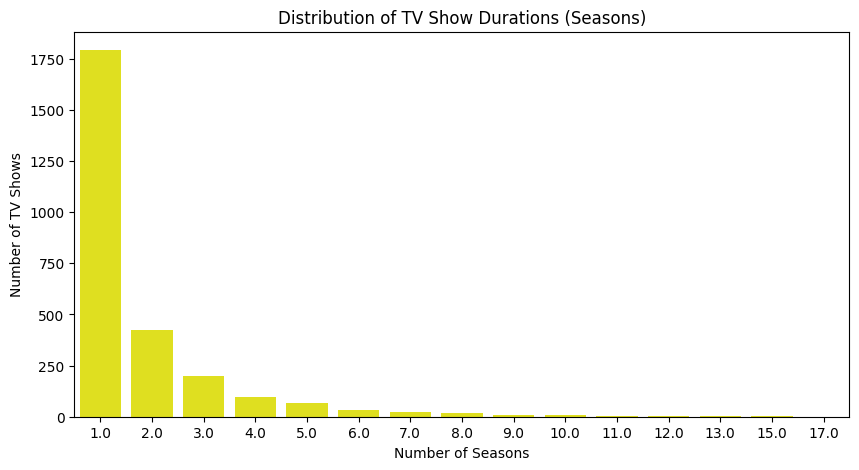

In [33]:
# For Movies
plt.figure(figsize=(10, 5))
sns.histplot(movies['duration_minutes'], bins=30, color='green',kde=True)
plt.xlabel("Duration (Minutes)")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Durations")
plt.show()

# For TV Shows
plt.figure(figsize=(10, 5))
sns.countplot(x='duration_seasons', data=tv_shows,color='yellow')
plt.xlabel("Number of Seasons")
plt.ylabel("Number of TV Shows")
plt.title("Distribution of TV Show Durations (Seasons)")
plt.show()

In [34]:
# Q7 Analyze trends in the popularity of different genres over time.
# Extract release year and genres
df['year_added'] = pd.to_datetime(df['date_added']).dt.year
df['genres'] = df['listed_in'].str.split(', ')

# Explode the genres column to create a row for each genre per title
genre_trends = df[['year_added', 'genres']].explode('genres')

# Group by year and genre to count occurrences
genre_counts_by_year = genre_trends.groupby(['year_added', 'genres'])['genres'].count().reset_index(name='count')

<ipython-input-35-6f17611a3ebb>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


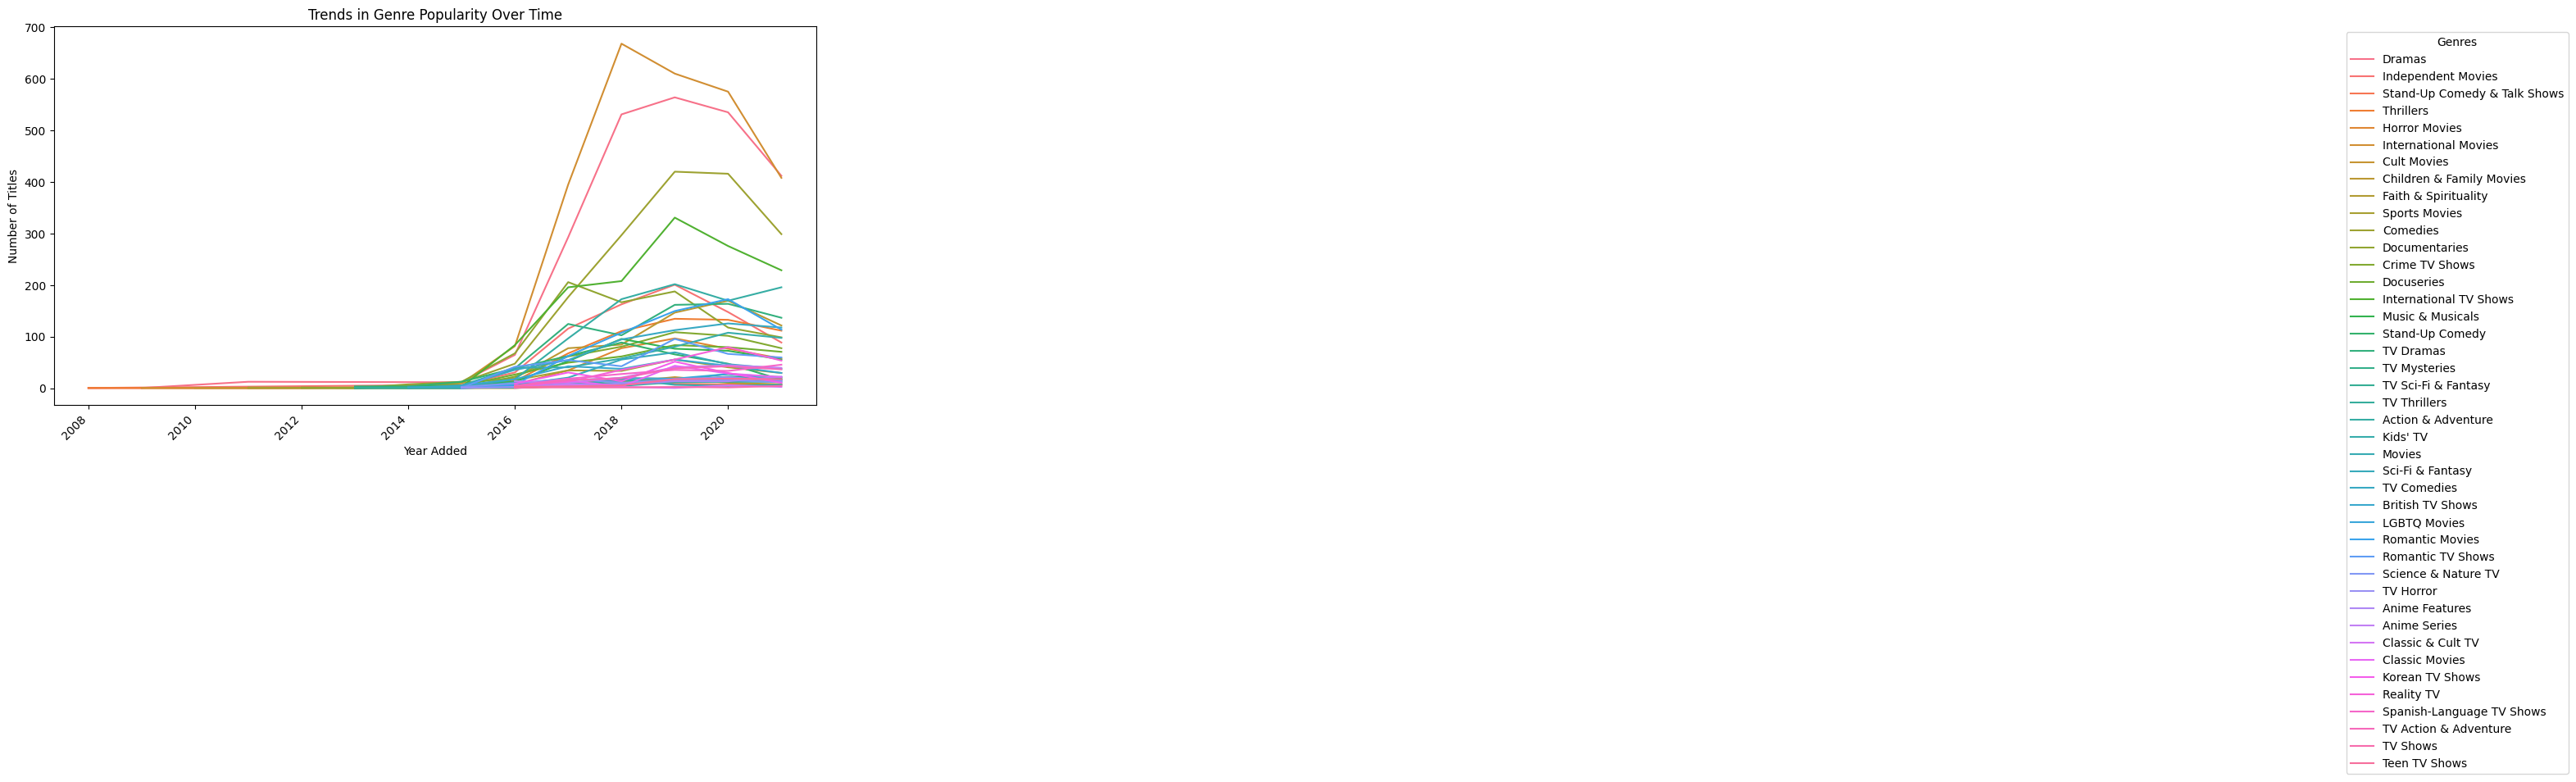

In [35]:
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_counts_by_year, x='year_added', y='count', hue='genres')
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.title("Trends in Genre Popularity Over Time")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genres', bbox_to_anchor=(3.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
# Q8 Exploring the distribution of content across different countries & regions :
countries = df['country'].str.split(', ').explode()
country_counts = countries.value_counts()

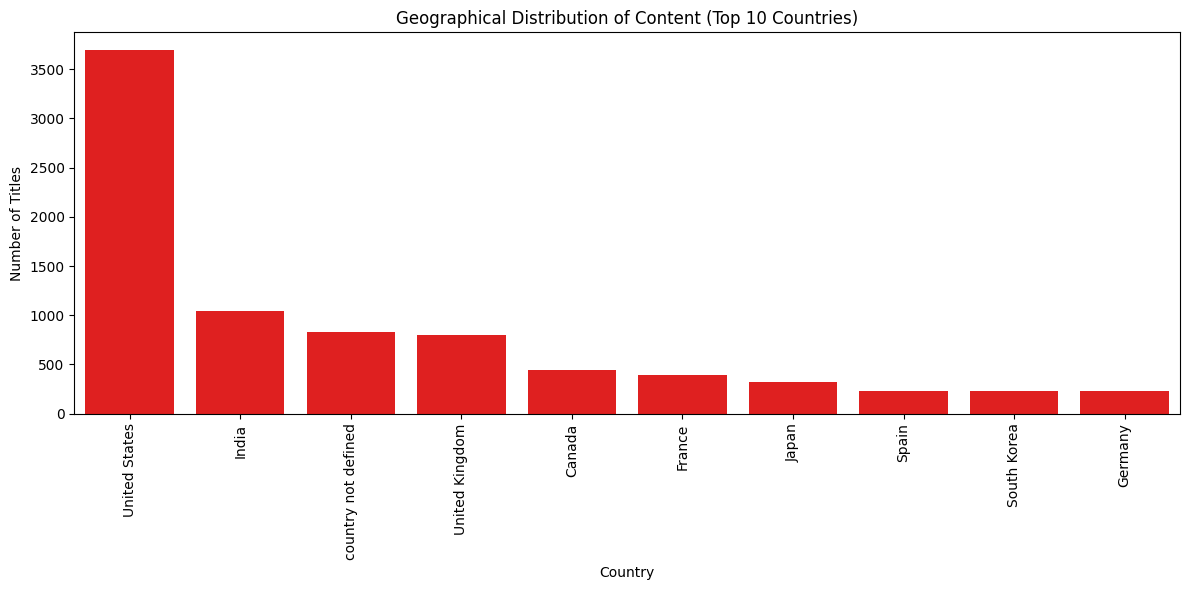

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values, color='red')
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Geographical Distribution of Content (Top 10 Countries)")
plt.tight_layout()
plt.show()

In [38]:
# Now Grouping countries into Regions.
# For example:
region_mapping = {'United States':'North America', 'India':'Asia', 'United Kingdom':'Europe'}

df['region'] = df['country'].map(region_mapping)
region_counts = df['region'].value_counts()

# Plotting pie chart for regional distribution
fig = px.pie(values=region_counts.values, names=region_counts.index, title='Regional Distribution of Content')
fig.show()

In [39]:
# Q9 Investigate potential correlations between variables.
# Convert 'duration' to numerical format for movies
movies = df[df['type'] == 'Movie']
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

# Convert ratings to numerical format using a mapping
rating_mapping = {
    'TV-MA': 6, 'TV-14': 5, 'TV-PG': 4, 'R': 3, 'PG-13': 2,
    'TV-Y7': 1, 'TV-Y': 0, 'TV-G': 0, 'PG': 1, 'G': 0,
    'NC-17': 7, 'TV-Y7-FV': 1, 'UR': np.nan, 'NR': np.nan,
    'rating not defined': np.nan
}
movies['rating_numeric'] = movies['rating'].map(rating_mapping)

<ipython-input-39-179106524968>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-179106524968>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
# Calculate the correlation between 'rating_numeric' and 'duration_minutes'
correlation = movies[['rating_numeric', 'duration_minutes']].corr()

# Display the correlation matrix
print(correlation)

                  rating_numeric  duration_minutes
rating_numeric          1.000000          0.125378
duration_minutes        0.125378          1.000000


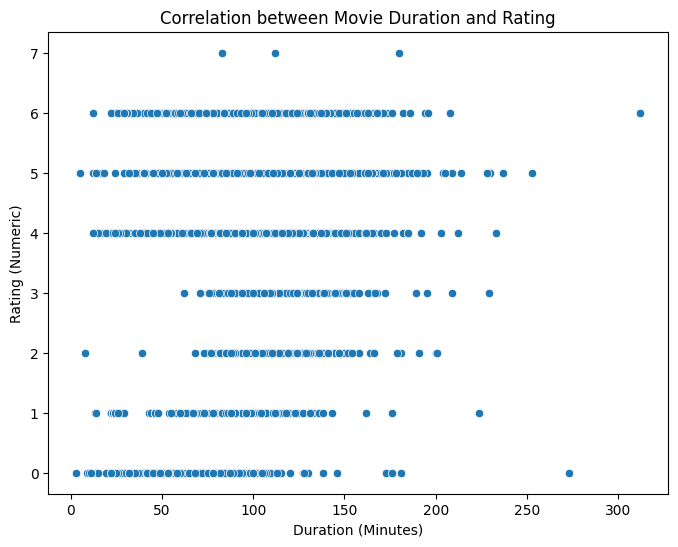

In [41]:
# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration_minutes', y='rating_numeric', data=movies)
plt.title('Correlation between Movie Duration and Rating')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Rating (Numeric)')
plt.show()

In [42]:
# Q10 Evaluate the diversity of content by analyzing the number of unique genres and categories.
genres = df['listed_in'].str.split(', ').explode()
unique_genres = genres.unique()
num_unique_genres = len(unique_genres)
print(f"Number of unique genres: {num_unique_genres}")


Number of unique genres: 42


In [43]:
# Assuming 'listed_in' column contains both genres and categories.
unique_categories = df['listed_in'].str.split(', ').explode().unique()
num_unique_categories = len(unique_categories)
print("Number of unique categories (including genres):", num_unique_categories)

Number of unique categories (including genres): 42


Distribution of genres:
listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Kore

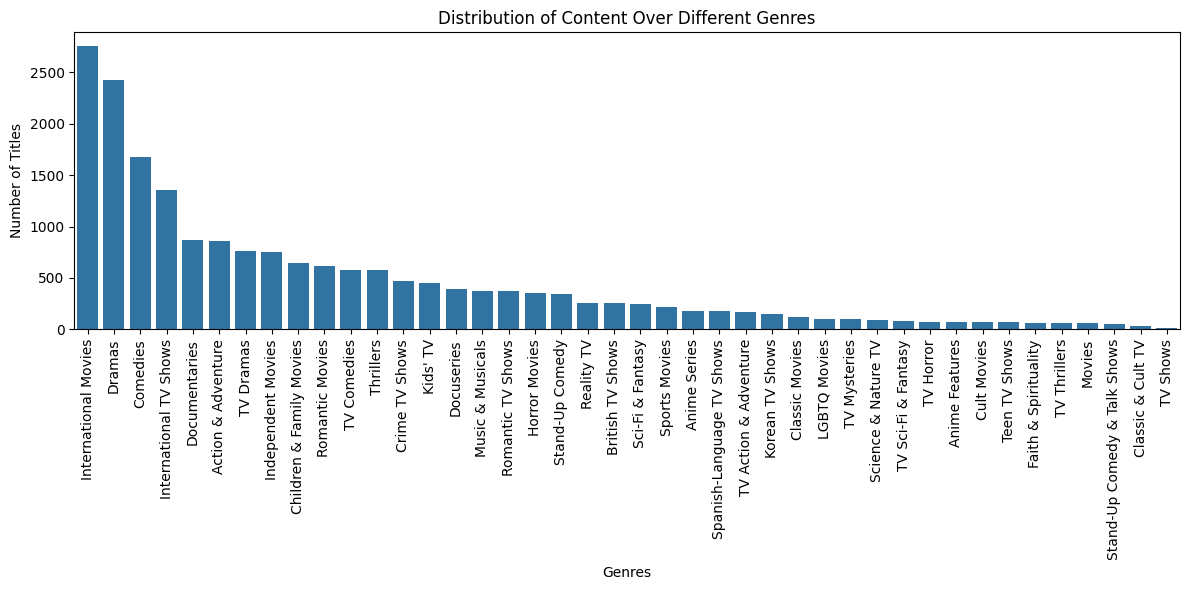

In [44]:
genre_counts = genres.value_counts()
print("Distribution of genres:")
print(genre_counts)

# Plotting for visualization (optional):
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of Titles")
plt.title("Distribution of Content Over Different Genres")
plt.tight_layout()
plt.show()

<ipython-input-45-527b3beef480>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-527b3beef480>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



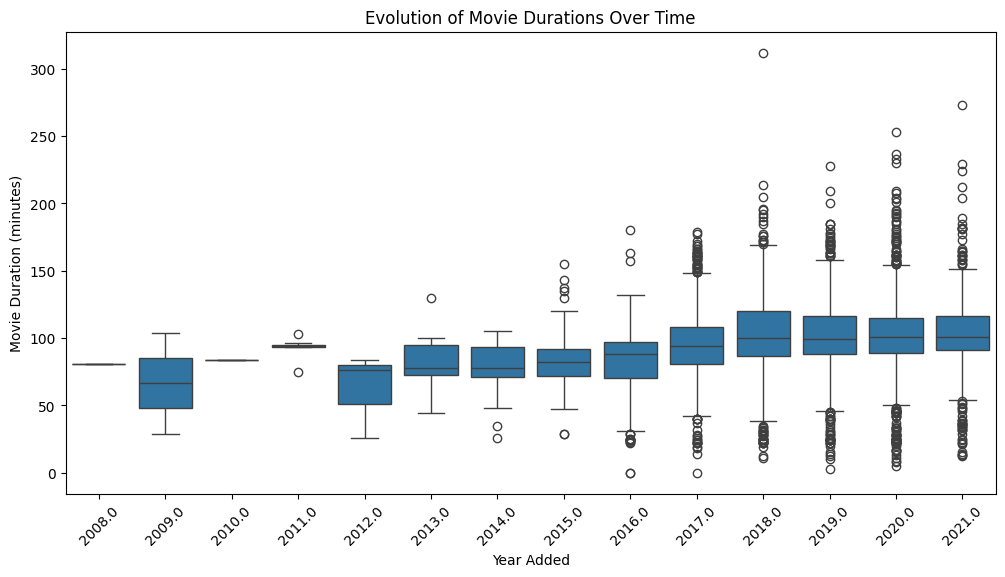

<ipython-input-45-527b3beef480>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-527b3beef480>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



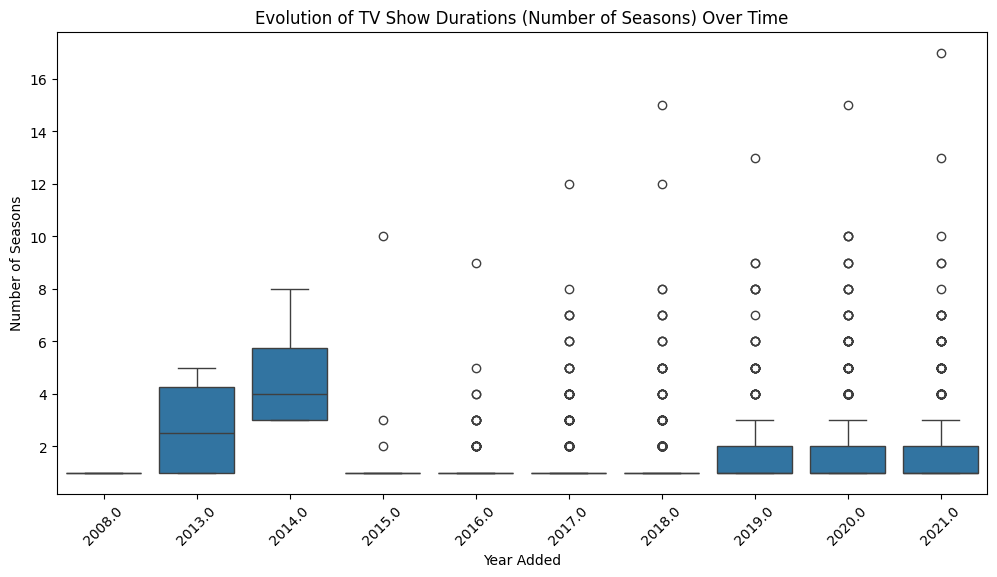

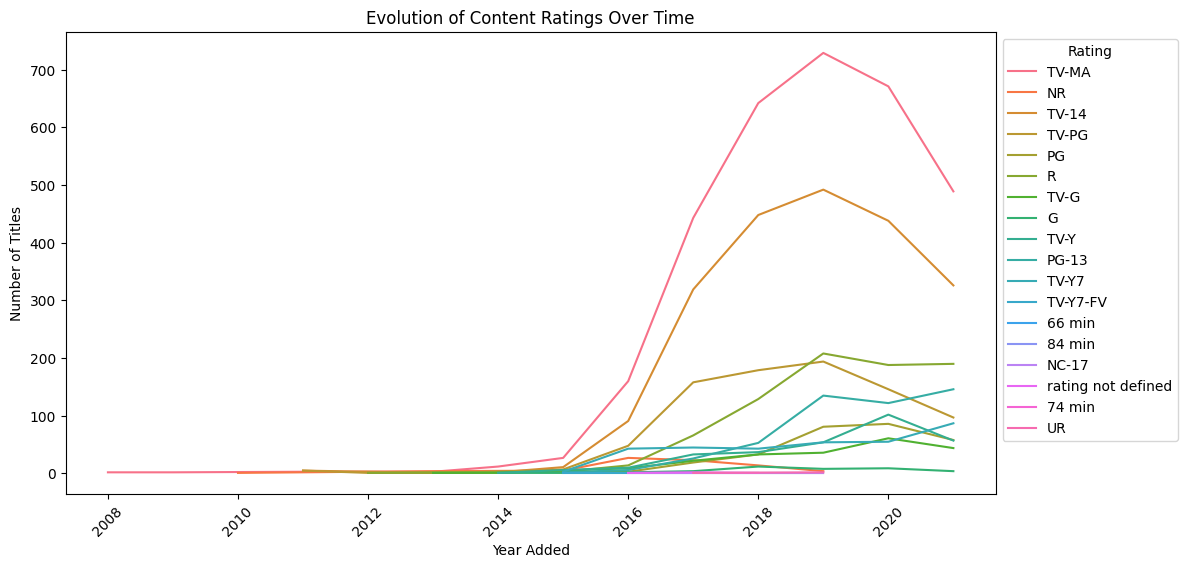

In [45]:
# Q11 Explore how the characteristics of content (e.g., duration, ratings) have evolved over the years.'''
# Evolution of Movie Durations Over Time
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
movies = df[df['type'] == 'Movie']

# Create the 'duration_type' column for movies
# Extract numerical duration from the 'duration' column
movies['duration_type'] = movies['duration'].str.extract('(\d+)').astype(float) # Changed to float
# Convert to integers, handling NaNs by filling with 0 or dropping
movies['duration_type'] = pd.to_numeric(movies['duration_type'], errors='coerce').fillna(0).astype(int) # Convert to int, handle NaNs

plt.figure(figsize=(12, 6))
sns.boxplot(data=movies, x='year_added', y='duration_type')
plt.title('Evolution of Movie Durations Over Time')
plt.xlabel('Year Added')
plt.ylabel('Movie Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

# Evolution of TV Show Durations (Number of Seasons) Over Time
tv_shows = df[df['type'] == 'TV Show']

# Create the 'duration_type' column for TV shows
# Extract numerical duration (number of seasons) from the 'duration' column
tv_shows['duration_type'] = tv_shows['duration'].str.extract('(\d+)').astype(float) # Changed to float
# Convert to integers, handling NaNs by filling with 0 or dropping
tv_shows['duration_type'] = pd.to_numeric(tv_shows['duration_type'], errors='coerce').fillna(0).astype(int)  # Convert to int, handle NaNs


plt.figure(figsize=(12, 6))
sns.boxplot(data=tv_shows, x='year_added', y='duration_type')
plt.title('Evolution of TV Show Durations (Number of Seasons) Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Seasons')
plt.xticks(rotation=45)
plt.show()

#Evolution of Content Ratings Over Time
rating_trends = df.groupby(['year_added', 'rating'])['show_id'].count().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=rating_trends, x='year_added', y='count', hue='rating')
plt.title('Evolution of Content Ratings Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Rating', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()